In [ ]:
# Homework 2 Part 1 (due 7/07/2024)

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [3]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


R2 0.03530218264671636


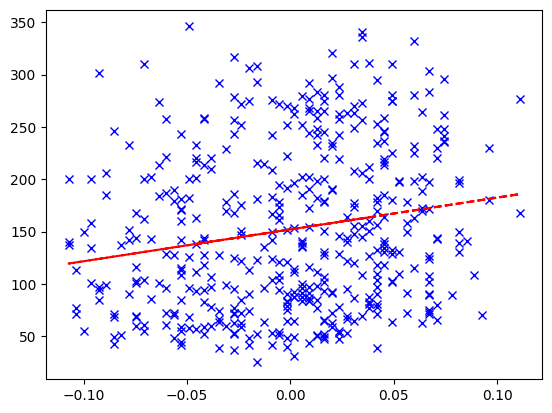

In [4]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# select first variable
var_name1 = var_names[0]

# select data associated with the first variable
x1 = X[var_name1]

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

# get residuals
resid = yHat-y

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yHat, ls='--', color='red')

Variable: age
R-squared: 0.0353
Mean Squared Error (MSE): 5720.547
Residual Standard Error (RSE): 75.806
t-statistic for coefficient: 4.0127
reduced f-statistic: 16.101374010745634
-----------------------------


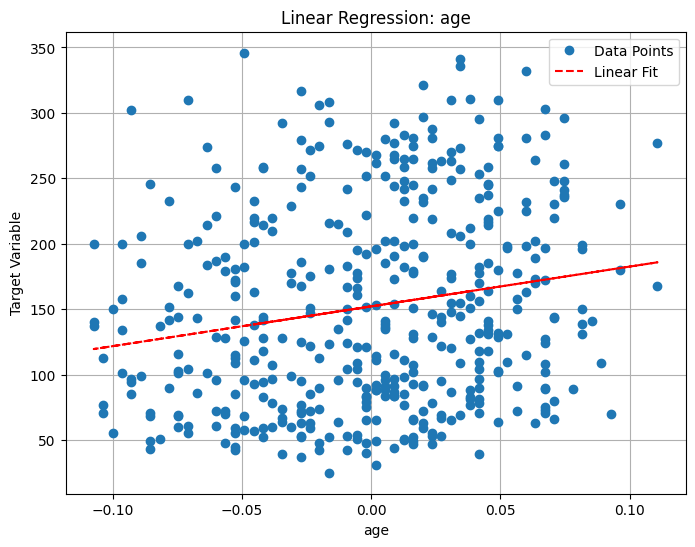

Variable: sex
R-squared: 0.0019
Mean Squared Error (MSE): 5918.8889
Residual Standard Error (RSE): 77.109
t-statistic for coefficient: 0.9041
reduced f-statistic: 0.8174234902529733
-----------------------------


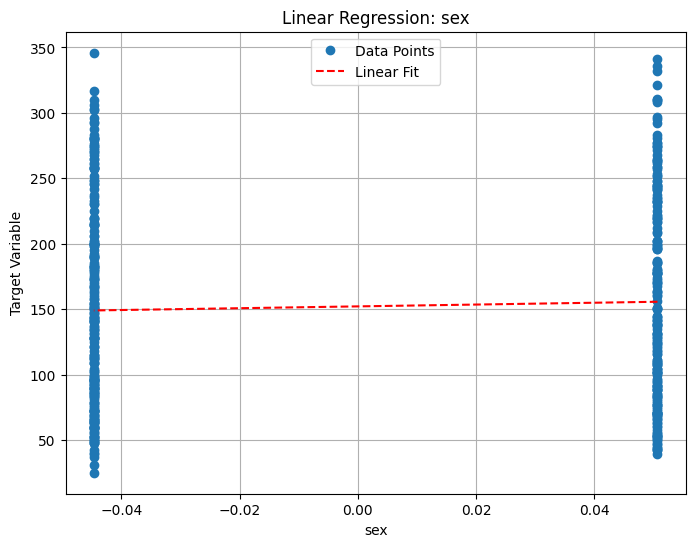

Variable: bmi
R-squared: 0.3439
Mean Squared Error (MSE): 3890.4566
Residual Standard Error (RSE): 62.5151
t-statistic for coefficient: 15.1873
reduced f-statistic: 230.6537644941266
-----------------------------


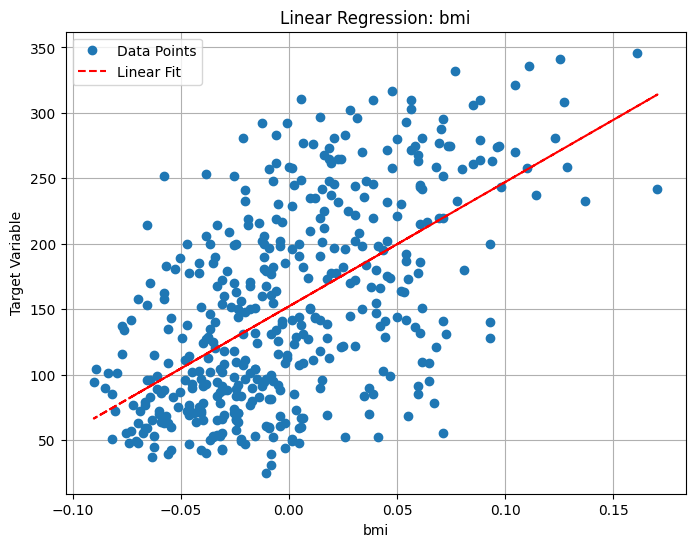

Variable: bp
R-squared: 0.1949
Mean Squared Error (MSE): 4774.1139
Residual Standard Error (RSE): 69.2518
t-statistic for coefficient: 10.3209
reduced f-statistic: 106.52013085528462
-----------------------------


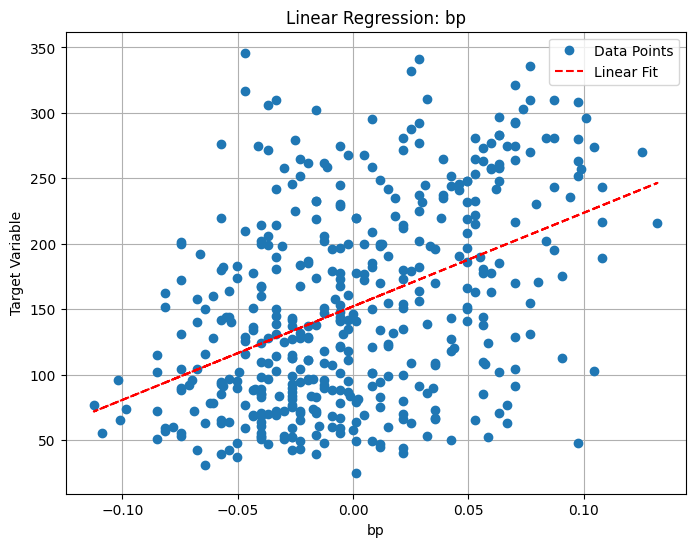

Variable: s1
R-squared: 0.045
Mean Squared Error (MSE): 5663.3156
Residual Standard Error (RSE): 75.4258
t-statistic for coefficient: 4.5509
reduced f-statistic: 20.710567446320177
-----------------------------


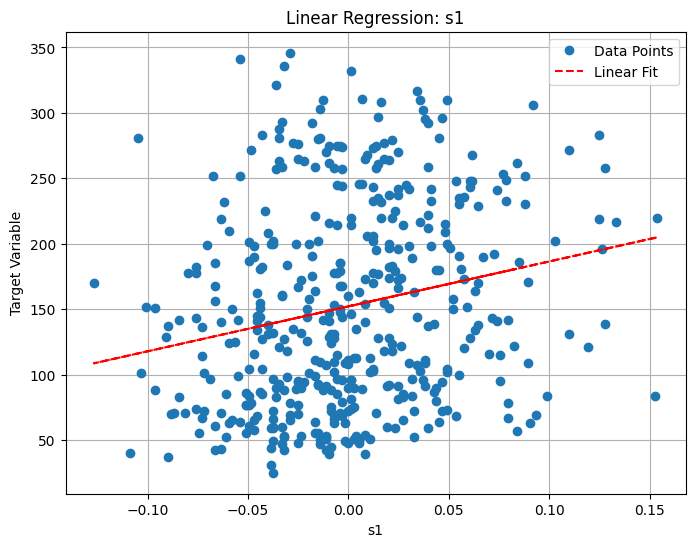

Variable: s2
R-squared: 0.0303
Mean Squared Error (MSE): 5750.2411
Residual Standard Error (RSE): 76.0025
t-statistic for coefficient: 3.7076
reduced f-statistic: 13.746079173190743
-----------------------------


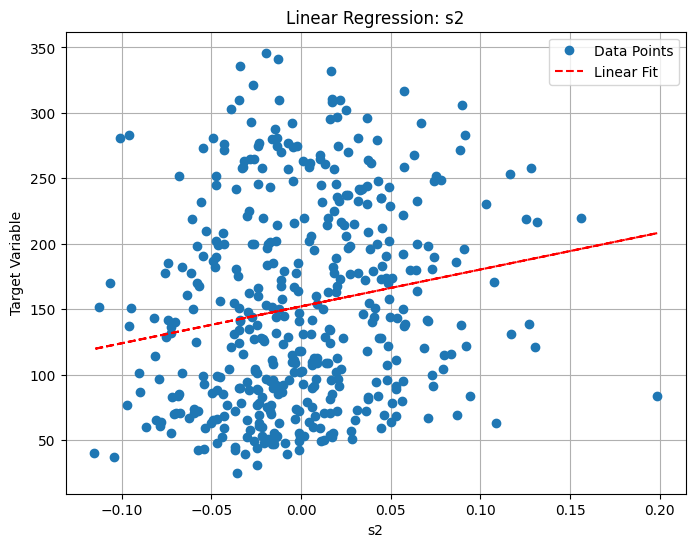

Variable: s3
R-squared: 0.1559
Mean Squared Error (MSE): 5005.6616
Residual Standard Error (RSE): 70.9113
t-statistic for coefficient: -9.0133
reduced f-statistic: 81.23965867875593
-----------------------------


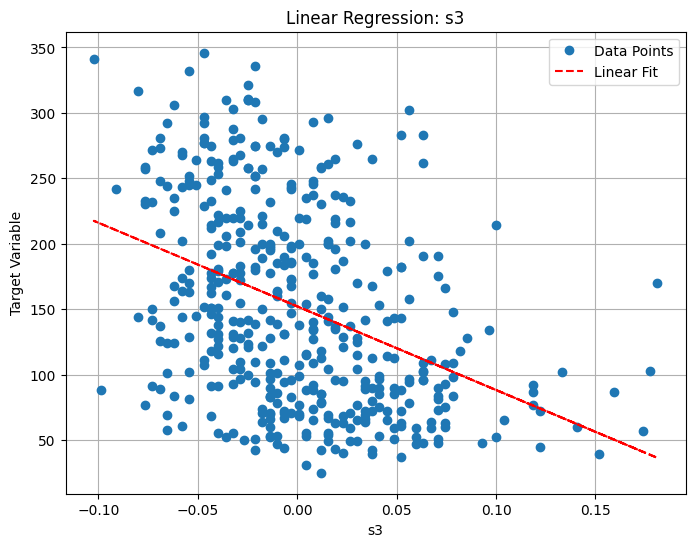

Variable: s4
R-squared: 0.1853
Mean Squared Error (MSE): 4831.1384
Residual Standard Error (RSE): 69.6642
t-statistic for coefficient: 10.0035
reduced f-statistic: 100.0692644133523
-----------------------------


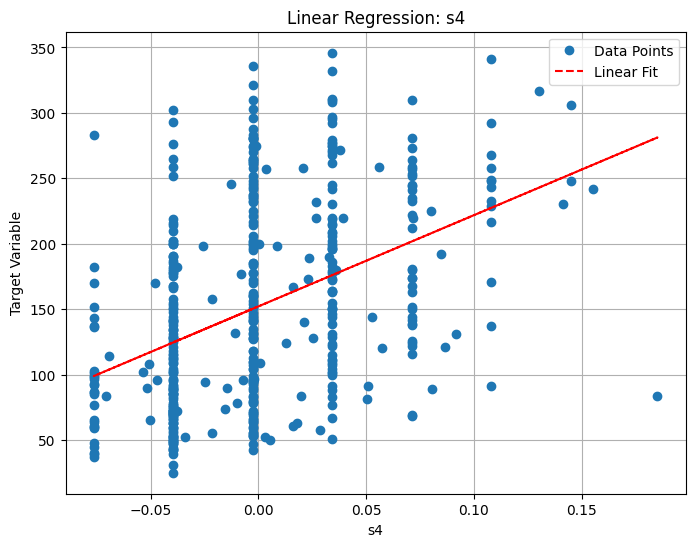

Variable: s5
R-squared: 0.3202
Mean Squared Error (MSE): 4030.9987
Residual Standard Error (RSE): 63.6343
t-statistic for coefficient: 14.3969
reduced f-statistic: 207.2711936170754
-----------------------------


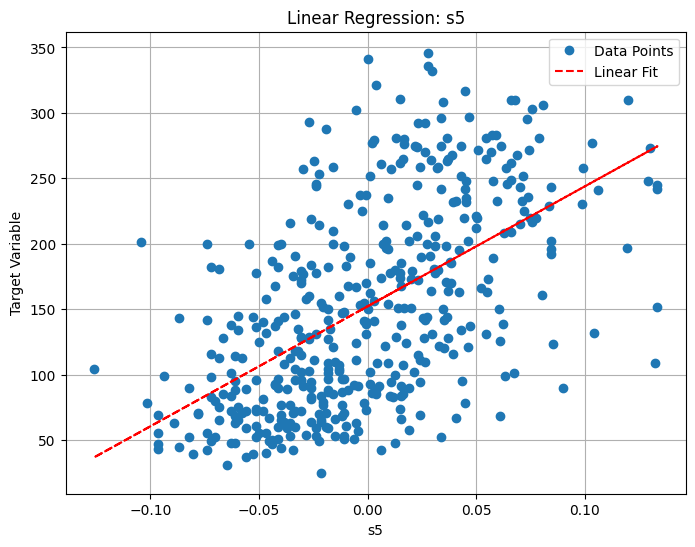

Variable: s6
R-squared: 0.1463
Mean Squared Error (MSE): 5062.3806
Residual Standard Error (RSE): 71.3119
t-statistic for coefficient: 8.6833
reduced f-statistic: 75.39968319740295
-----------------------------


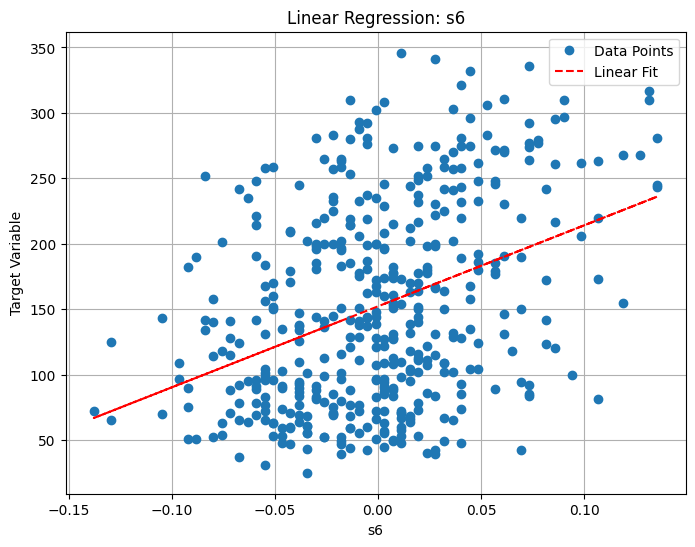

In [5]:
#Step 2 solutions and step 4 solutions for the t-statistic are included here
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#copy from the earlier model code
diabetes = load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

# take the model from sk-learn
model = LinearRegression()

# Initialize variables to store best model metrics
best_model = None
best_r2 = -np.inf

# Load the diabetes dataset
diabetes = load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

# Initialize model
model = LinearRegression()

#create variables n and p
n = X.shape[0]
#p = X.shape[1]
p = 1

# Function to fit linear regression model, plot results, and print statistics
def fit_and_plot(var_name, x_data, y_data):
    # Fit the model
    model.fit(x_data, y_data)

    #predictions
    y_pred = model.predict(x_data)

    #residuals
    residuals = y_pred - y_data
    rse = np.sqrt(np.sum(residuals**2) / (len(y_data) - 2))

    # Calculate R-squared
    r2 = model.score(x_data, y_data)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_data, y_pred)

    #t-statistic saying that df = n-2
    std_dev = np.std(x_data, ddof=1)
    t_stat = model.coef_[0] / (np.sqrt(np.sum((residuals**2/(len(y) - 2)))))
    #t_stat = model.coef_[0] / (std_dev / np.sqrt(np.sum((x_data - np.mean(x_data))**2)))

    #f-statistic formula
    f_stat_reduced = (r2/p) / ((1 - r2)/(n - p - 1))
    #print(var_name, "reduced f-statistic:", f_stat_reduced)

    # Print results for the variable
    print("Variable: " + var_name)
    print("R-squared: " + str(round(r2, 4)))
    print("Mean Squared Error (MSE): " + str(round(mse, 4)))
    print("Residual Standard Error (RSE): " + str(round(rse, 4)))
    print("t-statistic for coefficient: " + str(round(t_stat, 4)))
    print("reduced f-statistic:", f_stat_reduced)
    print("-----------------------------")

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(x_data, y_data, marker='o', linestyle='', label='Data Points')
    plt.plot(x_data, y_pred, linestyle='--', color='red', label='Linear Fit')
    plt.xlabel(var_name)
    plt.ylabel('Target Variable')
    plt.legend()
    plt.title('Linear Regression: ' + var_name)
    plt.grid(True)
    plt.show()  # Display plot immediately after printing

#use the created functions and plot for all the different variables
var_name = "age"
x_data = X[var_name].values.reshape(-1, 1)
fit_and_plot(var_name, x_data, y)

var_name = "sex"
x_data = X[var_name].values.reshape(-1, 1)
fit_and_plot(var_name, x_data, y)

var_name = "bmi"
x_data = X[var_name].values.reshape(-1, 1)
fit_and_plot(var_name, x_data, y)

var_name = "bp"
x_data = X[var_name].values.reshape(-1, 1)
fit_and_plot(var_name, x_data, y)

var_name = "s1"
x_data = X[var_name].values.reshape(-1, 1)
fit_and_plot(var_name, x_data, y)

var_name = "s2"
x_data = X[var_name].values.reshape(-1, 1)
fit_and_plot(var_name, x_data, y)

var_name = "s3"
x_data = X[var_name].values.reshape(-1, 1)
fit_and_plot(var_name, x_data, y)

var_name = "s4"
x_data = X[var_name].values.reshape(-1, 1)
fit_and_plot(var_name, x_data, y)

var_name = "s5"
x_data = X[var_name].values.reshape(-1, 1)
fit_and_plot(var_name, x_data, y)

var_name = "s6"
x_data = X[var_name].values.reshape(-1, 1)
fit_and_plot(var_name, x_data, y)

In [6]:
#step 3 solutions are here
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import f

diabetes = load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Number of observations (n) and number of predictors (p)
n = X.shape[0]
#p = X.shape[1]
p = len(var_names)

# Calculate residuals
residuals = y_pred - y
RSE = np.sqrt(np.sum(residuals**2) / (n - p - 1))

# Calculate within-sample RSS
RSS = np.sum(residuals**2)

# Calculate R-squared
R2 = model.score(X, y)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y, y_pred)

# Calculate F-statistic
#MSR = RSS / p  # Mean Squared Regression
#F_statistic = MSR / RSE**2
F_statistic = (R2/p) / ((1 - R2)/(n - p - 1))

# Calculate critical value for F-statistic
alpha = 0.05  # Significance level
critical_value = f.ppf(1 - alpha, p, n - p - 1)

# Print results
print("Multivariate Linear Regression Results:")
print("***************************************")
print(f"Number of observations (n): {n}")
print(f"Number of predictors (p): {p}")
print(f"R-squared: {R2:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Residual Standard Error (RSE): {RSE:.4f}")
print(f"Within-sample RSS: {RSS:.4f}")
print(f"F-statistic: {F_statistic:.4f}")
print(f"Critical value for F-statistic (α = {alpha}): {critical_value:.4f}")

# Compare F-statistic with critical value
if F_statistic > critical_value:
    print("F-statistic is above critical value so one of the predictors are significant")
else:
    print("F-statistic is not above the critical value so none of the predictors are significant.")



Multivariate Linear Regression Results:
***************************************
Number of observations (n): 442
Number of predictors (p): 10
R-squared: 0.5177
Mean Squared Error (MSE): 2859.6963
Residual Standard Error (RSE): 54.1542
Within-sample RSS: 1263985.7856
F-statistic: 46.2724
Critical value for F-statistic (α = 0.05): 1.8527
F-statistic is above critical value so one of the predictors are significant


ANSWER TO PROBELM 4

The 3 variables with the greatest f reduced statistic are bmi, s5, and bp with the values of 230, 206, and 106 respectively. these also match the three lowest r^2 values. This makes sense because f_reduced and r^2 both represent having a data with variables that have likely correlation.

In [11]:
#Step 5 Solutions here

from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def fit_and_plot(var_name, x_train, y_train, x_test, y_test):
    # Initialize model
    model = LinearRegression()

    # Fit the model on training data
    model.fit(x_train, y_train)

    # Predictions on training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate metrics for training data
    r2_train = model.score(x_train, y_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rss_train = np.sum((y_train_pred - y_train)**2)
    rse_train = np.sqrt(rss_train / (len(y_train) - x_train.shape[1] - 1))

    # Calculate metrics for testing data
    r2_test = model.score(x_test, y_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rss_test = np.sum((y_test_pred - y_test)**2)
    rse_test = np.sqrt(rss_test / (len(y_test) - x_test.shape[1] - 1))

    # Print results for the variable
    print("Variable: " + var_name)
    print("Training Set:")
    print("  R-squared: " + str(round(r2_train, 4)))
    print("  Mean Squared Error (MSE): " + str(round(mse_train, 4)))
    print("  Residual Standard Error (RSE): " + str(round(rse_train, 4)))
    print("Test Set:")
    print("  R-squared: " + str(round(r2_test, 4)))
    print("  Mean Squared Error (MSE): " + str(round(mse_test, 4)))
    print("  Residual Standard Error (RSE): " + str(round(rse_test, 4)))
    print("-----------------------------")


# Loop over each independent variable and fit models
for var_name in diabetes.feature_names:
    x_train = X_train[var_name].values.reshape(-1, 1)
    x_test = X_test[var_name].values.reshape(-1, 1)
    fit_and_plot(var_name, x_train, y_train, x_test, y_test)

# Fit a multivariate linear model on training data
model_multivariate = LinearRegression()
model_multivariate.fit(X_train, y_train)

# Evaluate on training data
y_train_pred = model_multivariate.predict(X_train)
r2_train_multivariate = model_multivariate.score(X_train, y_train)
mse_train_multivariate = mean_squared_error(y_train, y_train_pred)
rss_train_multivariate = np.sum((y_train_pred - y_train)**2)
rse_train_multivariate = np.sqrt(rss_train_multivariate / (len(y_train) - X_train.shape[1] - 1))

# Evaluate on testing data
y_test_pred = model_multivariate.predict(X_test)
r2_test_multivariate = model_multivariate.score(X_test, y_test)
mse_test_multivariate = mean_squared_error(y_test, y_test_pred)
rss_test_multivariate = np.sum((y_test_pred - y_test)**2)
rse_test_multivariate = np.sqrt(rss_test_multivariate / (len(y_test) - X_test.shape[1] - 1))

# Calculate F-statistic
f_statistic = (r2_test_multivariate / X_test.shape[1]) / ((1 - r2_test_multivariate) / (len(y_test) - X_test.shape[1] - 1))

# Print results for multivariate model
print("Multivariate Linear Regression Model:")
print("Training Set:")
print("  R-squared: " + str(round(r2_train_multivariate, 4)))
print("  Mean Squared Error (MSE): " + str(round(mse_train_multivariate, 4)))
print("  Residual Standard Error (RSE): " + str(round(rse_train_multivariate, 4)))
print("Test Set:")
print("  R-squared: " + str(round(r2_test_multivariate, 4)))
print("  Mean Squared Error (MSE): " + str(round(mse_test_multivariate, 4)))
print("  Residual Standard Error (RSE): " + str(round(rse_test_multivariate, 4)))
print("  F-statistic: " + str(round(f_statistic, 4)))



Variable: age
Training Set:
  R-squared: 0.0386
  Mean Squared Error (MSE): 5841.7515
  Residual Standard Error (RSE): 76.6488
Test Set:
  R-squared: 0.0083
  Mean Squared Error (MSE): 5254.232
  Residual Standard Error (RSE): 73.3145
-----------------------------
Variable: sex
Training Set:
  R-squared: 0.0001
  Mean Squared Error (MSE): 6076.0903
  Residual Standard Error (RSE): 78.171
Test Set:
  R-squared: -0.009
  Mean Squared Error (MSE): 5345.9811
  Residual Standard Error (RSE): 73.9519
-----------------------------
Variable: bmi
Training Set:
  R-squared: 0.3657
  Mean Squared Error (MSE): 3854.1127
  Residual Standard Error (RSE): 62.2581
Test Set:
  R-squared: 0.2334
  Mean Squared Error (MSE): 4061.8259
  Residual Standard Error (RSE): 64.4609
-----------------------------
Variable: bp
Training Set:
  R-squared: 0.1978
  Mean Squared Error (MSE): 4874.3607
  Residual Standard Error (RSE): 70.0152
Test Set:
  R-squared: 0.1734
  Mean Squared Error (MSE): 4379.3895
  Residual

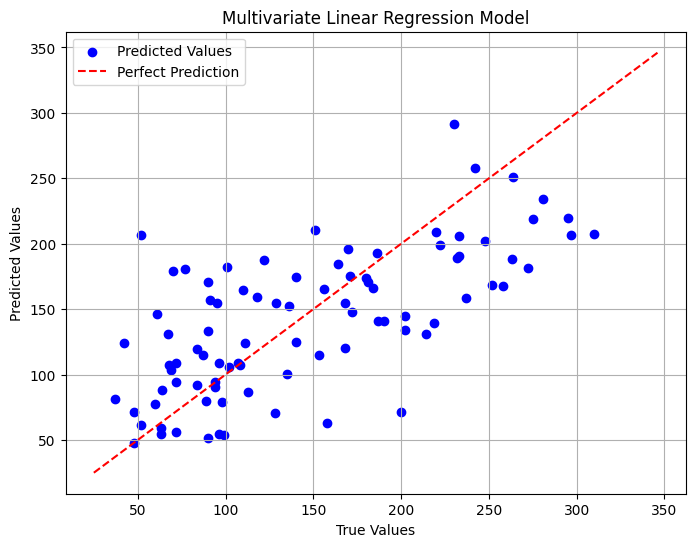

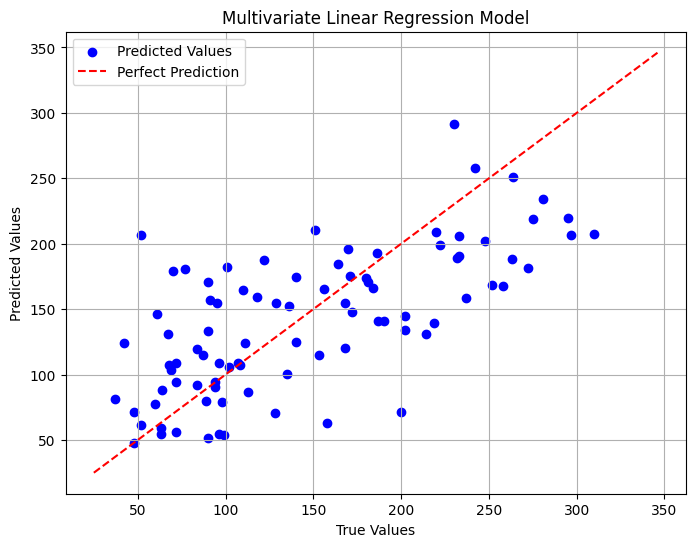

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


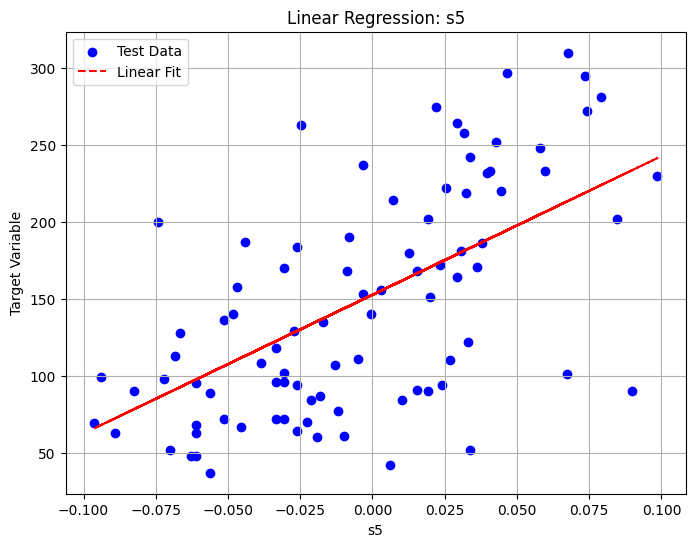

In [14]:
#plots for the best ones (highest r^2 on test set)

# Plotting the multivariate linear regression model -- best R^2 overall
plt.figure(figsize=(8, 6))
plt.scatter(y_test, model_multivariate.predict(X_test), color='blue', label='Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Multivariate Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

# Find the best variable based on highest R-squared on the test set
best_variable = max(individual_metrics, key=lambda k: individual_metrics[k]['r2_test'])

# Plotting the multivariate linear regression model (best R-squared overall)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, model_multivariate.predict(X_test), color='blue', label='Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Multivariate Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

# plot s5 which has the best r^2 value
x_test_best = X_test[[best_variable]].values.reshape(-1, 1)
model.fit(X_train[[best_variable]], y_train)
y_test_pred_best = model.predict(x_test_best)

plt.figure(figsize=(8, 6))
plt.scatter(x_test_best, y_test, color='blue', label='Test Data')
plt.plot(x_test_best, y_test_pred_best, linestyle='--', color='red', label='Linear Fit')
plt.xlabel(best_variable)
plt.ylabel('Target Variable')
plt.legend()
plt.title('Linear Regression: ' + best_variable)
plt.grid(True)
plt.show()




STEP 5 ANALYSIS

The residual error (RSE) decreases when movnig from the training set to the test set. This is because the model actual accounts for the noise in the training data but it does not in the test data.

The R^2 actually changes from variable to variable whether it decreases or increases from the training data to the test set. This is because although R2 is theoretically higher on the training data since there is often overfitting, a drop in R2 also means that there was a overgeneratlization that wasn't really correct.